# Softmax Regression

We want to build a model to discriminate **red**, **green**, and **blue** points in 2-dimensional space.

Given a point in 2D space $\textbf{x}=(x_1, x_2)$, we want to output either **red**, **green**, or **blue**.

In [ ]:
# Setting up dataset
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

X = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
	      [ 1.3, 0.9],
	      [-0.6, 0.4],
	      [-1.6, 0.2],
	      [ 0.2, 0.2],
	      [-0.3,-0.4],
	      [ 0.7,-0.8],
	      [ 1.1,-1.5],
	      [-1.0, 0.9],
	      [-0.5, 1.5],
	      [-1.3,-0.4],
	      [-1.4,-1.2],
	      [-0.9,-0.7],
	      [ 0.4,-1.3],
	      [-0.4, 0.6],
	      [ 0.3,-0.5],
	      [-1.6,-0.7],
	      [-0.5,-1.4],
	      [-1.0,-1.4]])

y = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])

In [ ]:
colormap = np.array(['r', 'g', 'b'])
def plot_scatter(X, y, colormap):
    plt.grid()
    plt.xlim(left=-2.0, right=2.0)
    plt.ylim(bottom=-2.0, top=2.0)
    plt.scatter(X[:,0], X[:, 1], s=80, c=colormap[y])

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)

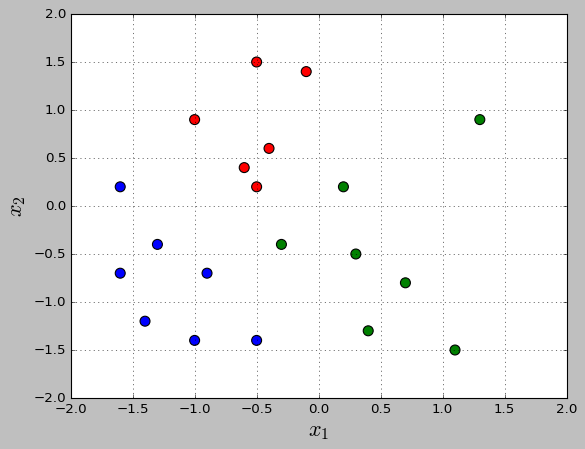

In [ ]:
plot_scatter(X, y, colormap)

We can use **Softmax Regression** for this problem. Softmax Regression can be called **Multinomial Logistic Regression**. 

This is a generalization of Logistic Regression (for 2 classes) to arbitrary number of classes.

## One-hot vector representation

We represent the output as one-hot vector.

For example, we represent **red** as $\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix}$, **green** as $\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix}$, and **blue** as $\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}$.

In [ ]:
print(y)

[0 0 1 0 2 1 1 1 1 0 0 2 2 2 1 0 1 2 2 2]


In [ ]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Convert the labels to one-hot encoding
Y = np.eye(3)[y]
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Computation Graph

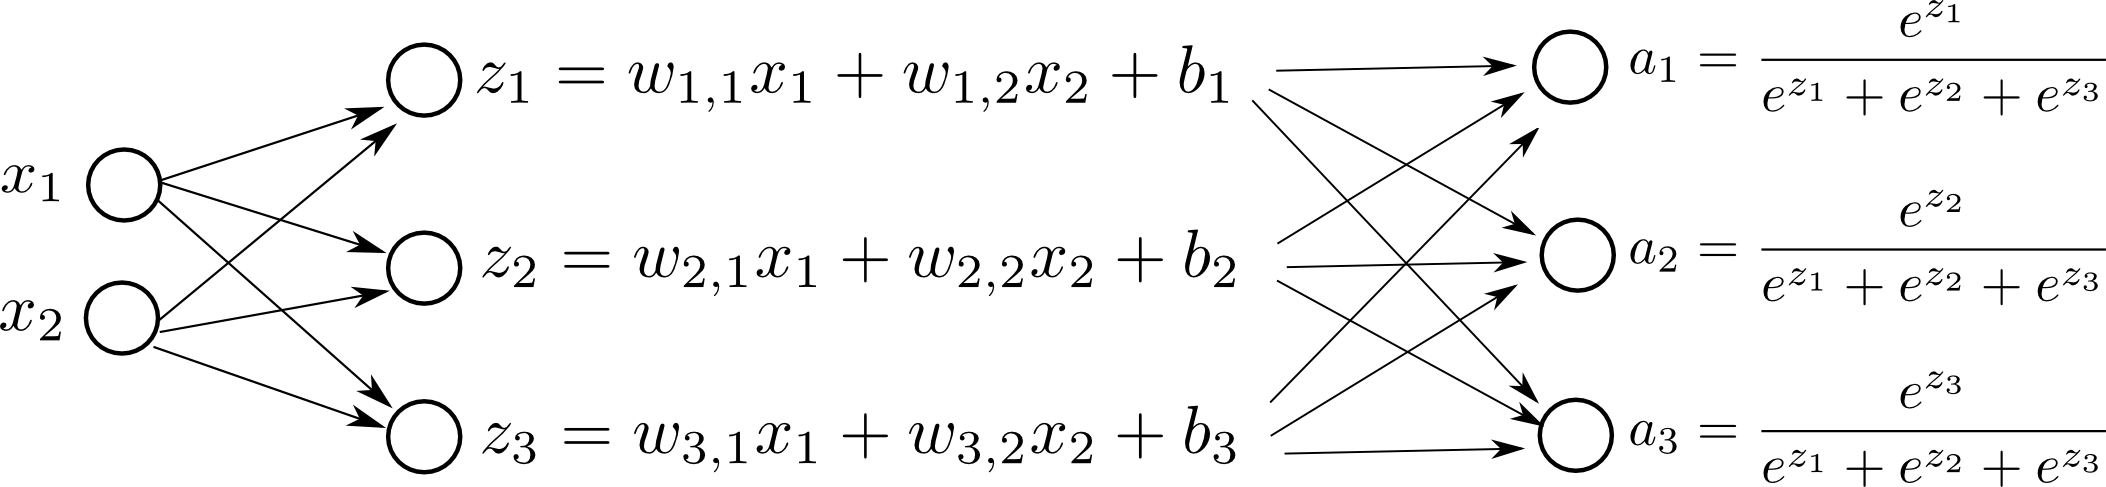

The parameters of our Softmax Regression model are:

$\textbf{W} = \begin{bmatrix}
w_{11} & w_{12}\\
w_{21} & w_{22}\\
w_{31} & w_{32}\\
\end{bmatrix}
$ and $\textbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}$

We need to **learn** these parameters of the Softmax Regression model. The process of finding out the appropriate values for these parameters from our dataset so that the predictions of the model is as close as possible to the targets is called **training**.

## Problem Formulation

* The coordinates of all the data points are put into the matrix $\textbf{X}$.
* The labels of all data points are put into the vector $\textbf{y}$.
* Here, the dataset $(\textbf{X},\textbf{y})$ contains $m=20$ samples, and for each sample $i$ we have $(\textbf{x}^{(i)}, y^{(i)})$, where $\textbf{x}^{(i)}\in\mathbb{R}^2$ is the coordinate of the data point $(x^{(i)}_1, x^{(i)}_2)$, and $y^{(i)}\in\{0, 1, 2\}$ is its label (red, green, blue).
* Therefore, $\textbf{X}$ is of size $(20\times 2)$, and $\textbf{y}$ is of size $(20\times 1)$.
* We convert each $y^{(i)}$ into a one-hot vector. We thus convert vector $\textbf{y}$ into a matrix $\textbf{Y}$ of size $(20\times 3)$.


## Softmax Function

### Feed-forward Phase

**Feed-forward** means: given the model parameters $\textbf{W}$ and $\textbf{b}$, given a sample $(\textbf{x}, y)$, we produce the output $\textbf{a}$ and compute the loss $L$.

$\textbf{z} = \textbf{W}\textbf{x} + \textbf{b}$

where $\textbf{x}$ is the input coordinate vector of size $(2\times 1)$. Therefore, $\textbf{z}$ is of size $(3\times 1)$.

### Softmax

After getting $\textbf{z}$, we apply the softmax function to compute $\textbf{a}$.

$\textbf{a} = \text{softmax}(\textbf{z})$

$
a_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}
$

Here, because $\textbf{z}$ is of size $(3\times 1)$, $\textbf{a}$ is also of size $(3 \times 1)$, i.e., $(a_1, a_2, a_3)$.

The softmax function above produces a **probability distribution**, i.e., $\sum a_i = 1$.

In classification, we want to compute the probability that a sample belongs to a class/category.

### Example:
Calculate softmax values for $\textbf{z}=[1, 2, 3]^T$

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

z = np.array([1., 2., 3.])
print(z)
print(softmax(z))

[1. 2. 3.]
[0.09  0.245 0.665]


Softmax emphasizes the **relative difference** between large and small values.

However, naive implementation of softmax can suffer from numerical stability.

Example: Calculate softmax values for $\textbf{z}=[1000, 2000, 3000]^T$

In [ ]:
z = np.array([1000.0, 2000.0, 3000.0])
print(z)
print(softmax(z))

[1000. 2000. 3000.]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
np.exp(1000.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

### Numerically stable version

We can compute $\textbf{a}$ as follows.

$
a_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}} = \frac{e^{z_i} e^{K}}{\sum_{j=1}^C e^{z_j} e^{K}} =  \frac{e^{z_i+K}}{\sum_{j=1}^C e^{z_j+K}}
$

where $K=-\max(z_1, z_2, \ldots, z_C)$.

In [ ]:
def stable_softmax(z):
    return np.exp(z-max(z)) / np.sum(np.exp(z-max(z)))

z = np.array([1000., 2000., 3000.])
print(z)
print(stable_softmax(z))

[1000. 2000. 3000.]
[0. 0. 1.]


In [ ]:
import torch
torch.softmax(torch.tensor(z), 0)

tensor([0., 0., 1.], dtype=torch.float64)

### Feed-forward Implementation

Suppose someone already computed $\textbf{W}$ and $\textbf{b}$ for us as follows.

In [ ]:
W = np.array([[ 0.31, 3.95],
              [ 7.07, -0.23],
              [-6.27, -2.35]])

b = np.array([[ 1.2  ],
              [ 2.93 ],
              [-4.14 ]])

In [ ]:
def forward(W, b, x):
    z = np.matmul(W, x) + b
    a = stable_softmax(z)

    return z, a

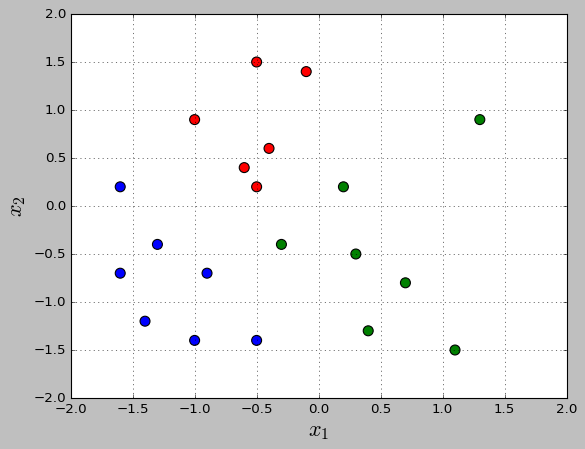

In [ ]:
plot_scatter(X, y, colormap)

Let's try to predict the class (red, green, or blue) of the first example in our datasets as follows.

In [ ]:
# X[0,:] has the shape (1,2)
x = X[0,:].reshape(2,1) # reshape from (1,2) --> (2,1)
z, a = forward(W, b, x)

print(x.squeeze())
print(z.squeeze())
print(a.squeeze())
print(y[0])

[-0.1  1.4]
[ 6.699  1.901 -6.803]
[0.992 0.008 0.   ]
0


The class of the first example is **red** (i.e., 0).

Our classifier predicts the probability of each class [red, green, blue] is [0.992, 0.008, 0.0].

If we already had weights $\textbf{W}$ and bias $\textbf{b}$, it's easy to make predictions.

But how to learn these parameters (weights and bias) properly?

# Maximum Likelihood Estimation (MLE) and Loss Function for Softmax Regression

We need to learn a matrix $\textbf{W}$ of size $(3\times 2)$ and a $\textbf{b}$ of size $(3\times 1)$ that best discriminates **red, green, blue** points.

Let's say we have 3 points and their classes (and their one-hot vector representations) as follows.

$\textbf{x}^{(1)}=\begin{bmatrix}-0.1\\1.4\end{bmatrix}
, \quad y^{(1)}=0 \quad \text{(red)} \quad \textbf{y}^{(1)}=\begin{bmatrix}1\\0\\0\end{bmatrix}$

$\textbf{x}^{(2)}=\begin{bmatrix}1.3\\0.9\end{bmatrix}
, \quad y^{(2)}=1 \quad \text{(green)} \quad \textbf{y}^{(2)}=\begin{bmatrix}0\\1\\0\end{bmatrix}$

$\textbf{x}^{(3)}=\begin{bmatrix}-1.4\\-1.1\end{bmatrix}
, \quad y^{(3)}=2 \quad \text{(blue)} \quad \textbf{y}^{(3)}=\begin{bmatrix}0\\0\\1\end{bmatrix}$

Assume that there's a classifier that makes the following predictions $\textbf{a}$'s about these 3 points.

$\textbf{y}^{(1)} =\begin{bmatrix}1\\0\\0\end{bmatrix} \quad \textbf{a}^{(1)}=\begin{bmatrix}0.9\\0.1\\0\end{bmatrix}$


$\textbf{y}^{(2)} =\begin{bmatrix}0\\1\\0\end{bmatrix} \quad \textbf{a}^{(2)}=\begin{bmatrix}0.1\\0.8\\0.1\end{bmatrix}$


$\textbf{y}^{(3)} =\begin{bmatrix}0\\0\\1\end{bmatrix} \quad \textbf{a}^{(3)}=\begin{bmatrix}0.1\\0.2\\0.7\end{bmatrix}$

Is this a good classifier? How **likely** is it?

Intuitively, we want to find a classifier that produces $\textbf{a}$'s similar to $\textbf{y}$'s.

For example, if $\textbf{y}^{(i)} =\begin{bmatrix}0\\1\\0\end{bmatrix}$, having $\textbf{a}^{(i)} =\begin{bmatrix}0.1\\0.8\\0.1\end{bmatrix}$ is **more desirable** than having $\textbf{a}^{(i)} =\begin{bmatrix}0.2\\0.6\\0.2\end{bmatrix}$.


The **likelihood** of the classifier producing $\textbf{a}^{(i)}$ regarding **one example** is:

$\prod_{j=1}^3 (a_j^{(i)})^{y_j^{(i)}}$

For example, with $\textbf{a}^{(1)}$ and $\textbf{y}^{(1)}$ as above, we have:

$\prod_{j=1}^3 (a_j^{(i)})^{y_j^{(i)}}=(0.9)^1\times (0.1)^0 \times (0.0)^0 = 0.9 \times 1 \times 1 = 0.9$

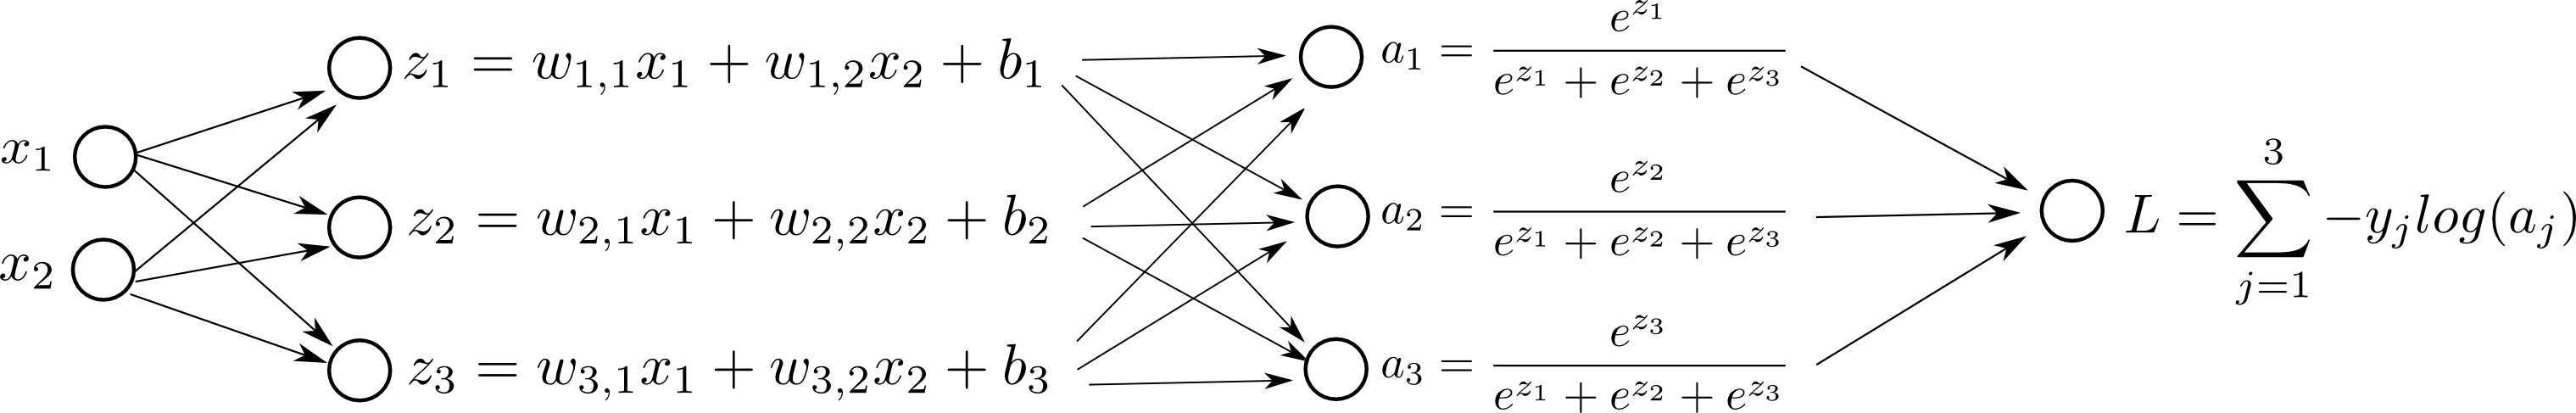

Similar to the case of **Logistic Regression**, we need to apply **Maximum Likelihood Estimation** (MLE) for **multiple examples**.

We need to find weights $\textbf{W}$ and bias $\textbf{b}$ to maximize the following.

$\prod_{i=1}^{N} \prod_{j=1}^3 (a_j^{(i)})^{y_j^{(i)}}$ where $\textbf{a}=\text{softmax}(\textbf{W}\textbf{x}^{(i)}+\textbf{b})$

$\textbf{x}^{(i)}, \textbf{y}^{(i)}$ is the $i$-th example in our dataset of $N$ training examples.


Maximizing the above is equal to maximizing the following:

$\log\big(\prod_{i=1}^{N} \prod_{j=1}^3 (a_j^{(i)})^{y_j^{(i)}}\big)
=\sum_{i=1}^{N} \sum_{j=1}^3 \log(a_j^{(i)})^{y_j^{(i)}}
=\sum_{i=1}^{N} \sum_{j=1}^3 y_j^{(i)}\log(a_j^{(i)})$

Maximizing the above is similar to minimize the following:

$J = -\sum_{i=1}^{N} \sum_{j=1}^3 y_j^{(i)}\log(a_j^{(i)})$

which is the **loss function** (cost function/log loss function) for our Softmax Regression problem here. 

This loss function can also be called **Cross Entropy Loss** function.

In this example, we have only 3 classes **red, green, blue**. In the general case, where we need to make prediction for $C$ classes , the loss function of Softmax Regression would be:
$J = -\sum_{i=1}^{N} \sum_{j=1}^C y_j^{(i)}\log(a_j^{(i)})$

## Numerical Stability of Loss Function

The loss function for one sample is

$L=-\sum_{j=1}^C y_j\log(a_j)$

In [ ]:
def compute_loss(y, a):
    return -1.0 * np.sum(y * np.log(a))

The logarithm function is not numerically stable for small input values $0<a_j<1$.

So we derive a different computation as follows.

$\begin{equation}L = -\sum_{j=1}^C y_j\log(a_j)\\
=-\sum_{j=1}^C y_j\log\big(\frac{e^{z_j}}{\sum_{k=1}^C e^{z_k} } \big)\\
=-\sum_{j=1}^C y_j\log\big(\frac{e^{z_j+K}}{\sum_{k=1}^C e^{z_k+K} } \big) \quad \text{where} \quad K=-\max(z_1,z_2,\ldots,z_C)\\
=-\sum_{j=1}^C y_j\big[\log(e^{z_j+K}) - \log(\sum_{k=1}^C e^{z_k+K} )\big]\\
=-\sum_{j=1}^C y_j\big[z_j+K - \log(\sum_{k=1}^C e^{z_k+K} )\big]\end{equation} $

The first log is eliminated. The domain of the second log function is $[1,\infty)$, which is the numerically stable range for the logarithm function.

In [ ]:
def compute_loss_stable_version(y, z):
    return -1.0 * np.sum(y * (z - z.max() - np.log(np.sum(np.exp(z-z.max())))))

# Gradient Descent for Softmax Regression

We can start with random weights $\textbf{W}$ and bias $\textbf{b}$.

We make the parameters (weights and bias) better and better gradually by updating the them in each iteration:

$\textbf{W} = \textbf{W} - \alpha\frac{dL}{d\textbf{W}}$

$\textbf{b} = \textbf{b} - \alpha\frac{dL}{d\textbf{b}}$

To compute the $\frac{dL}{d\textbf{W}}$ and $\frac{dL}{d\textbf{b}}$, we need to do **backpropagation**.

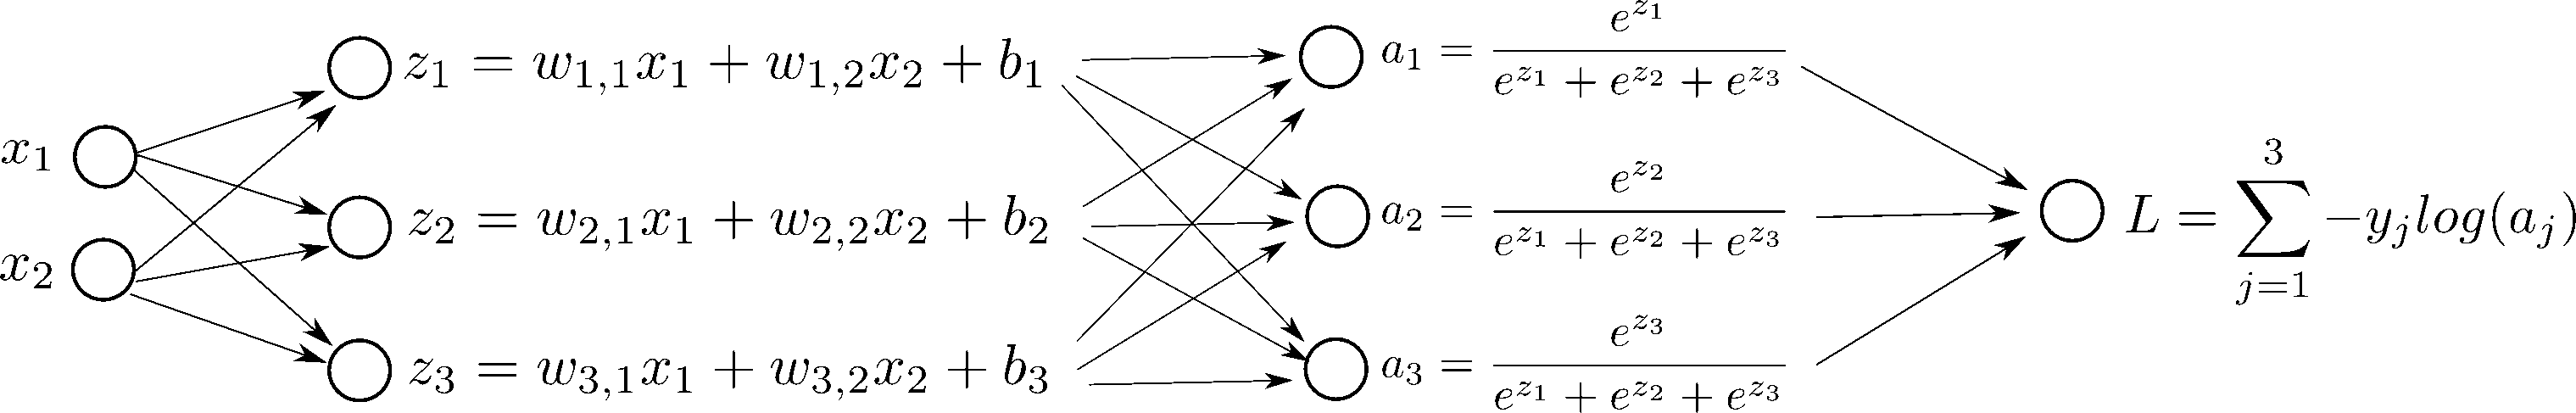

Let's compute each element of the gradient separately.

$
\frac{dL}{dw_{m,n}}=\sum_{i=1}^3 \frac{dL}{da_i} \frac{da_i}{dz_m} \frac{dz_m}{dw_{m,n}}
$

$
\frac{dL}{db_{m}}=\sum_{i=1}^3 \frac{dL}{da_i} \frac{da_i}{dz_m} \frac{dz_m}{db_{m}}
$

For example, if we want to compute $\frac{dL}{dw_{2,1}}$:

$\frac{dL}{dw_{2,1}}=\sum_{i=1}^3 \frac{dL}{da_i}\frac{da_i}{dz_2}\frac{dz_2}{dw_{2,1}}\\
=\frac{dL}{da_1}\frac{da_1}{dz_2}\frac{dz_2}{dw_{2,1}}+
\frac{dL}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{dw_{2,1}}+
\frac{dL}{da_3}\frac{da_3}{dz_2}\frac{dz_2}{dw_{2,1}}$

Changing $w_{2,1}$ leads to changing $z_2$, which leads to changing $a_1, a_2, a_3$, which all lead to chaning $L$.

Therefore, we are computing the effect of how changing $w_{2,1}$ influence $L$ over 3 different paths. We then sum up all the paths together to compute $\frac{dL}{dw_{2,1}}$.

We can easily compute these derivatives:

$\frac{dz}{dw_{m,n}}=\frac{d}{dw_{m,n}}(w_{m,1}x_1+w_{m,2}x_2+\ldots+w_{m,n}x_n+\ldots+w_{m,d}x_d+b_m)=x_n$

$\frac{dz}{db_{m}}=\frac{d}{db_{m}}(w_{m,1}x_1+w_{m,2}x_2+\ldots+w_{m,n}x_n+\ldots+w_{m,d}x_d+b_m)=1$

$\frac{dL}{da_i}=\frac{d}{da_i}\big(-\sum_{j=1}^C y_j\log(a_j)\big)=\frac{d}{da_i}(-y_i\log(a_i))=\frac{-y_i}{a_i}$

For the example above, we have:

$\frac{dz_2}{dw_{2,1}}=\frac{d}{dw_{2,1}}(w_{2,1}x_1+w_{2,2}x_2+b_2)=x_1$

$\frac{dz_2}{db_2}=\frac{d}{db_2}(w_{2,1}x_1+w_{2,2}x_2+b_2)=1$

$\frac{dL}{da_1}=\frac{d}{da_1}\big(-\sum_{j=1}^3 y_j\log(a_j)\big)=\frac{d}{da_1}(-y_1\log(a_1))=\frac{-y_1}{a_1}$

$\frac{dL}{da_2}=\frac{d}{da_2}\big(-\sum_{j=1}^3 y_j\log(a_j)\big)=\frac{d}{da_2}(-y_2\log(a_2))=\frac{-y_2}{a_2}$

$\frac{dL}{da_3}=\frac{d}{da_3}\big(-\sum_{j=1}^3 y_j\log(a_j)\big)=\frac{d}{da_3}(-y_3\log(a_3))=\frac{-y_3}{a_3}$

We still need to compute the derivative of the Softmax function $\frac{da_i}{dz_m}$

## Derivative of Softmax function

$\frac{da_i}{dz_m}$ tells us how much $a_i$ would change if $z_m$ changes.

$\frac{d}{dz_m}a_i=\frac{d}{dz_m}\big(\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\big)$

Applying the **Quotient Rule**

$\frac{d}{dx}\frac{f(x)}{g(x)}=\frac{f'(x)g(x)-g'(x)f(x)}{(g(x))^2}$

Here, $f(x) = e^{z_i}$ and $g(x)=\sum_{j=1}^C e^{z_j}$.

We have two cases, $i=m$ and $i\neq m$.

If $i=m$:

$\frac{d}{dz_m}a_i=\frac{d}{dz_m}\big(\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\big)\\
=\frac{(e^{z_i})'\sum_{j=1}^C e^{z_j}-(\sum_{j=1}^C e^{z_j})' e^{z_i}}{\big(\sum_{j=1}^C e^{z_j}\big)^2}\\
=\frac{e^{z_i}\sum_{j=1}^C e^{z_j}-e^{z_m} e^{z_i}}{\big(\sum_{j=1}^C e^{z_j}\big)^2}\\
=\frac{e^{z_i}\big(\sum_{j=1}^C e^{z_j}-e^{z_m}\big)}{\big(\sum_{j=1}^C e^{z_j}\big)^2}=\frac{e^{z_m}\big(\sum_{j=1}^C e^{z_j}-e^{z_m}\big)}{\big(\sum_{j=1}^C e^{z_j}\big)^2}\\
=\frac{e^{z_m}}{\sum_{j=1}^C e^{z_j}}\frac{\sum_{j=1}^C e^{z_j}-e^{z_m}}{\sum_{j=1}^C e^{z_j}}\\
=\frac{e^{z_m}}{\sum_{j=1}^C e^{z_j}}\big(\frac{\sum_{j=1}^C e^{z_j}}{\sum_{j=1}^C e^{z_j}}-\frac{e^{z_m}}{\sum_{j=1}^C e^{z_j}}\big)\\
=a_m(1-a_m)$

If $i\neq m$:

$\frac{d}{dz_m}a_i=\frac{d}{dz_m}\big(\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\big)\\
=\frac{(e^{z_i})'\sum_{j=1}^C e^{z_j}-(\sum_{j=1}^C e^{z_j})' e^{z_i}}{\big(\sum_{j=1}^C e^{z_j}\big)^2}\\
=\frac{0-(\sum_{j=1}^C e^{z_j})' e^{z_i}}{\big(\sum_{j=1}^C e^{z_j}\big)^2}
=\frac{-e^{z_m} e^{z_i}}{\big(\sum_{j=1}^C e^{z_j}\big)^2}\\
=-\frac{e^{z_m}}{\sum_{j=1}^C e^{z_j}}\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}
=-a_m a_i$

In summary, we have

$\frac{d}{dz_m}a_i = \begin{cases}
a_m(1-a_m) & \text{if } i=m \\
-a_m a_i & \text{if } i\neq m\end{cases}$

We can have $\frac{d}{d\textbf{z}}\textbf{a}$ as a $(C\times C)$ matrix.

For our example above, we have

$\frac{d}{d\textbf{z}}\textbf{a}=\begin{bmatrix}
\frac{da_1}{dz_1} & \frac{da_2}{dz_1} &\frac{da_3}{dz_1} \\
\frac{da_1}{dz_2} & \frac{da_2}{dz_2} &\frac{da_3}{dz_2} \\
\frac{da_1}{dz_3} & \frac{da_2}{dz_3} &\frac{da_3}{dz_3} 
\end{bmatrix}$

$
\begin{bmatrix}
a_1(1-a_1) & a_1(-a_2) & a_1(-a_3)\\
a_2(-a_1) & a_2(1-a_2) & a_2(-a_3) \\
a_3(-a_1) & a_3(-a_2) & a_3(1-a_3)
\end{bmatrix}
$

## Backpropagation Phase

In the backpropagation phase, we compute $\frac{dL}{d\textbf{W}}$ and $\frac{dL}{d\textbf{b}}$ using the derivatives we have computed above.

**NOTE**: The notations here are for the sake of convenience.

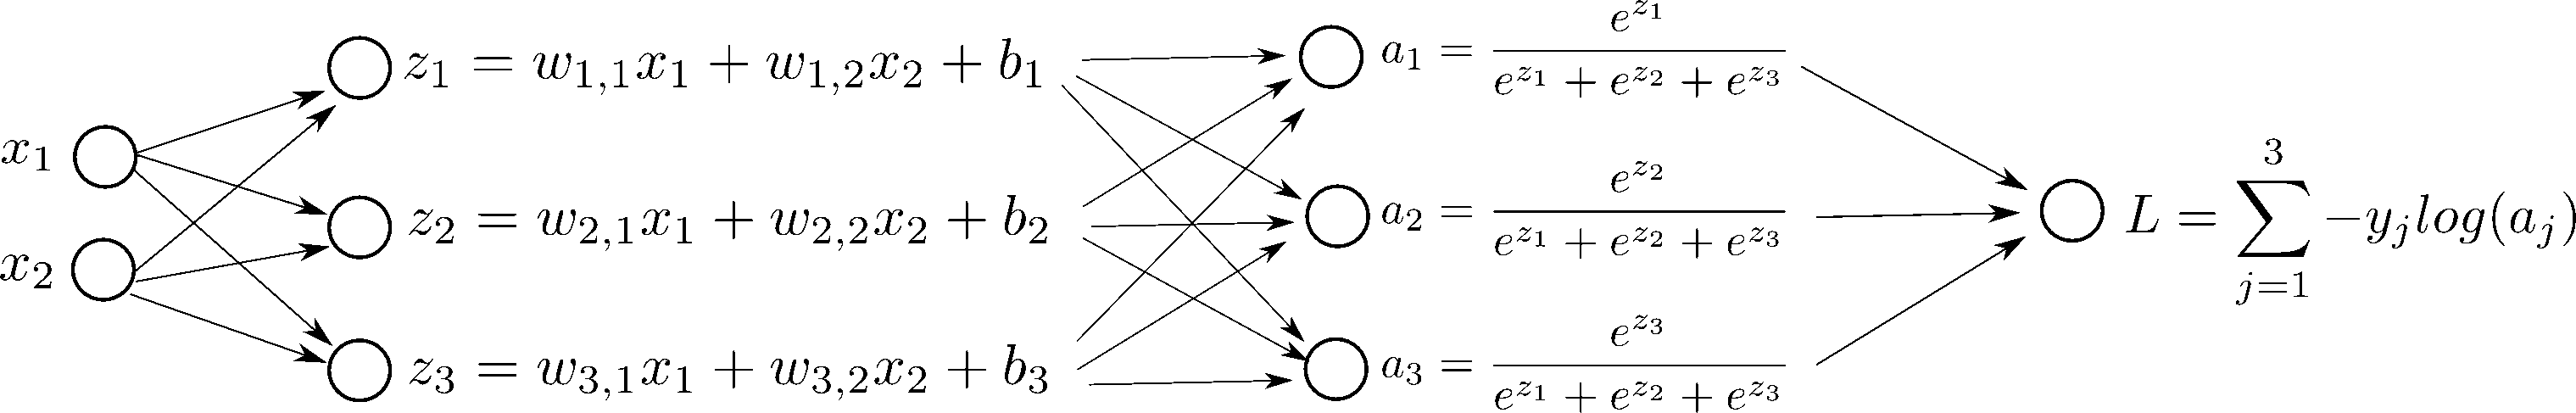

For the example here, we have

$\frac{dL}{d\textbf{W}}=
\begin{bmatrix}
\frac{dL}{dw_{1,1}} & \frac{dL}{dw_{1,2}} \\
\frac{dL}{dw_{2,1}} & \frac{dL}{dw_{2,2}} \\
\frac{dL}{dw_{3,1}} & \frac{dL}{dw_{3,2}} \\
\end{bmatrix}$ and $\frac{dL}{d\textbf{b}}=
\begin{bmatrix}
\frac{dL}{db_1}\\\frac{dL}{db_2}\\\frac{dL}{db_3}
\end{bmatrix}$


Above, we already had 

$\frac{dL}{dw_{2,1}}=\sum_{i=1}^3 \frac{dL}{da_i}\frac{da_i}{dz_2}\frac{dz_2}{dw_{2,1}}\\
=\frac{dL}{da_1}\frac{da_1}{dz_2}\frac{dz_2}{dw_{2,1}}+
\frac{dL}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{dw_{2,1}}+
\frac{dL}{da_3}\frac{da_3}{dz_2}\frac{dz_2}{dw_{2,1}}\\
=\big(\frac{dL}{da_1}\frac{da_1}{dz_2}+\frac{dL}{da_2}\frac{da_2}{dz_2}+\frac{dL}{da_3}\frac{da_3}{dz_2}\big)\frac{dz_2}{dw_{2,1}}\\
=\frac{dL}{dz_2}\frac{dz_2}{dw_{2,1}}$

Similarly,

$\frac{dL}{db_2}=\sum_{i=1}^3 \frac{dL}{da_i}\frac{da_i}{dz_2}\frac{dz_2}{db_2}
=\frac{dL}{da_1}\frac{da_1}{dz_2}\frac{dz_2}{db_2}+
\frac{dL}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{db_2}+
\frac{dL}{da_3}\frac{da_3}{dz_2}\frac{dz_2}{db_2}
=\big(\frac{dL}{da_1}\frac{da_1}{dz_2}+\frac{dL}{da_2}\frac{da_2}{dz_2}+\frac{dL}{da_3}\frac{da_3}{dz_2}\big)\frac{dz_2}{db_2}\\
=\frac{dL}{dz_2}\frac{dz_2}{db_2}$


We can compute $\frac{dL}{dz_1}, \frac{dL}{dz_2}, \frac{dL}{dz_3}$ as follows.

$\frac{dL}{d\textbf{z}} = \begin{bmatrix}
\frac{dL}{dz_1}\\\frac{dL}{dz_2}\\\frac{dL}{dz_3}\end{bmatrix}
=\begin{bmatrix}
\frac{dL}{da_1}\frac{da_1}{dz_1}+\frac{dL}{da_2}\frac{da_2}{dz_1}+\frac{dL}{da_3}\frac{da_3}{dz_1}\\
\frac{dL}{da_1}\frac{da_1}{dz_2}+\frac{dL}{da_2}\frac{da_2}{dz_2}+\frac{dL}{da_3}\frac{da_3}{dz_2}\\
\frac{dL}{da_1}\frac{da_1}{dz_3}+\frac{dL}{da_3}\frac{da_2}{dz_3}+\frac{dL}{da_3}\frac{da_3}{dz_3}\\
\end{bmatrix}
=
\begin{bmatrix}
\frac{da_1}{dz_1} & \frac{da_2}{dz_1} &\frac{da_3}{dz_1} \\
\frac{da_1}{dz_2} & \frac{da_2}{dz_2} &\frac{da_3}{dz_2} \\
\frac{da_1}{dz_3} & \frac{da_2}{dz_3} &\frac{da_3}{dz_3} 
\end{bmatrix}
\begin{bmatrix}
\frac{dL}{da_1}\\\frac{dL}{da_2}\\\frac{dL}{da_3}\\\end{bmatrix}
=\frac{d\textbf{a}}{d\textbf{z}}\frac{dL}{d\textbf{a}}$ 

We have 

$\frac{dz_1}{dw_{1,1}}=x_1\quad \frac{dz_1}{dw_{2,2}}=x_2 \quad \frac{dz_1}{db_1}=1$

$\frac{dz_2}{dw_{2,1}}=x_1\quad \frac{dz_2}{dw_{2,2}}=x_2 \quad \frac{dz_2}{db_2}=1$

$\frac{dz_3}{dw_{3,1}}=x_1\quad \frac{dz_3}{dw_{3,2}}=x_2 \quad \frac{dz_3}{db_3}=1$

We then have

$\frac{dL}{d\textbf{W}}=
\begin{bmatrix}
\frac{dL}{dw_{1,1}} & \frac{dL}{dw_{1,2}} \\
\frac{dL}{dw_{2,1}} & \frac{dL}{dw_{2,2}} \\
\frac{dL}{dw_{3,1}} & \frac{dL}{dw_{3,2}} \\
\end{bmatrix} = 
\begin{bmatrix}
\frac{dL}{dz_1}\frac{dz_1}{dw_{1,1}} & \frac{dL}{dz_1}\frac{dz_1}{dw_{1,2}} \\
\frac{dL}{dz_2}\frac{dz_2}{dw_{2,1}} & \frac{dL}{dz_2}\frac{dz_2}{dw_{2,2}} \\
\frac{dL}{dz_3}\frac{dz_3}{dw_{3,1}} & \frac{dL}{dz_3}\frac{dz_1}{dw_{3,2}} \\
\end{bmatrix}= 
\begin{bmatrix}
\frac{dL}{dz_1}x_1 & \frac{dL}{dz_1}x_2 \\
\frac{dL}{dz_2}x_1 & \frac{dL}{dz_2}x_2 \\
\frac{dL}{dz_3}x_1 & \frac{dL}{dz_3}x_2 
\end{bmatrix}=
\begin{bmatrix}
\frac{dL}{dz_1}\\\frac{dL}{dz_2}\\\frac{dL}{dz_3}
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}=
\frac{dL}{d\textbf{z}}\textbf{x}^T$

and

$\frac{dL}{d\textbf{b}}=
\begin{bmatrix}
\frac{dL}{db_1}\\\frac{dL}{db_2}\\\frac{dL}{db_3}
\end{bmatrix} = 
\begin{bmatrix}
\frac{dL}{dz_1}\frac{dz_1}{db_1}\\
\frac{dL}{dz_2}\frac{dz_1}{db_2}\\
\frac{dL}{dz_3}\frac{dz_1}{db_3}
\end{bmatrix} = 
\begin{bmatrix}
\frac{dL}{dz_1}1\\
\frac{dL}{dz_2}1\\
\frac{dL}{dz_3}1
\end{bmatrix} =
\begin{bmatrix}
\frac{dL}{dz_1}\\
\frac{dL}{dz_2}\\
\frac{dL}{dz_3}
\end{bmatrix} = \frac{dL}{d\textbf{z}}$

In [ ]:
def compute_gradient(x, y, z, a):
    # compute dL/da
    da = -y / a
    
    # compute da/dz
    matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3,1)), a.T))

    # compute dL/dz
    dz = np.matmul(matrix, da)

    # compute dL/dW
    dW = np.matmul(dz, x.T)
    # compute dL/db
    db = dz.copy()

    return dW, db

Now we can implement Gradient Descent to learn the parameters of Softmax Regression for our problem here as follows.

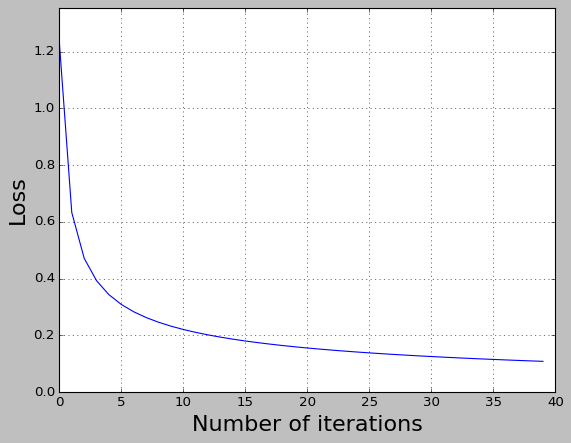

In [ ]:
learning_rate = 2.0 # This is just for this DEMO. Normally, learning rate is quite small.
num_epochs = 40

def gradient_descent(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db

    return W, b

# random initialization
W_initial = np.random.rand(3,2)
W = W_initial.copy()
b = np.zeros((3,1))

W_cache = []
b_cache = []
L_cache = []

for i in range(num_epochs):
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    L = 0

    # Loop through each example in the dataset
    for j in range(X.shape[0]):
        x_j = X[j,:].reshape(2,1)
        y_j = Y[j,:].reshape(3,1)

        z_j, a_j = forward(W, b, x_j)
        loss_j = compute_loss_stable_version(y_j, z_j)
        dW_j, db_j = compute_gradient(x_j, y_j, z_j, a_j)

        dW += dW_j
        db += db_j
        L += loss_j
    
    dW = (1.0/X.shape[0]) * dW
    db = (1.0/X.shape[0]) * db
    L = (1.0/X.shape[0]) * L

    # gradient descent
    W, b = gradient_descent(W, b, dW, db, learning_rate)

    W_cache.append(W)
    b_cache.append(b)
    L_cache.append(L)

plt.grid()
plt.xlabel('Number of iterations', size=20)
plt.ylabel('Loss', size=20)
plt.ylim(bottom=0.0, top=max(L_cache)*1.1)
plt.plot(L_cache)

## Decision Boundary

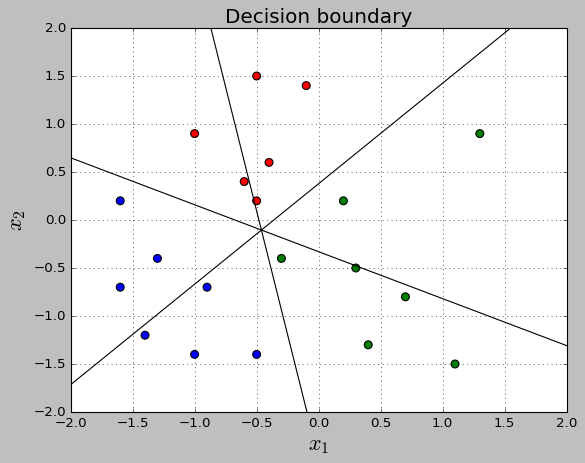

In [ ]:
def plot_decision_boundary(X, Y, W, b):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

  xs = np.array([-2.0, 2.0])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

plot_decision_boundary(X, Y, W, b)

In [ ]:
# Import for animation on Google Colab
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
  xs = np.array([-2.0, 2.0])
  W = W_cache[i]
  b = b_cache[i]

  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  lines1.set_data(xs, ys1)
  lines2.set_data(xs, ys2)
  lines3.set_data(xs, ys3)

  text_box.set_text('Iteration: {}'.format(i))
  return lines1, lines2, lines3, text_box

lines1, = ax.plot([], [], c='black')
lines2, = ax.plot([], [], c='black')
lines3, = ax.plot([], [], c='black')

ax.grid()
ax.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])
text_box = ax.text(1.1, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(W_cache), blit=False, interval=500)
plt.close(fig)
anim

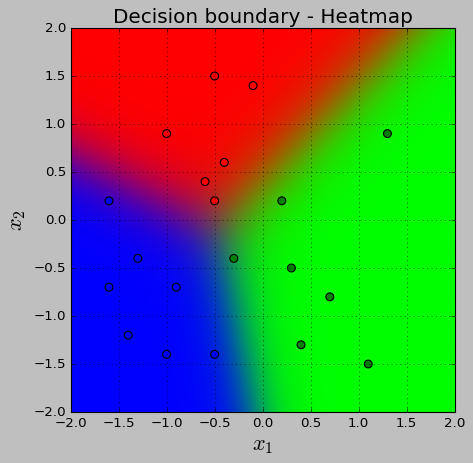

In [ ]:
NX = 100
NY = 100

def plot_decision_boundary_heatmap(X, Y, W, b):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Heatmap', size = 18)

  xs = np.linspace(-2.0, 2.0, NX)
  ys = np.linspace(2.0, -2.0, NY)
  xv, yv = np.meshgrid(xs, ys)
  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  A = []
  for j in range(X_fake.shape[0]):
    x_j = X_fake[j,:].reshape(2,1)
    z_j, a_j = forward(W, b, x_j)
    A.append(a_j)

  plt.imshow(np.array(A).reshape(NX, NY, 3), extent=[-2.0, 2.0, -2.0, 2.0])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

plot_decision_boundary_heatmap(X, Y, W_cache[-1], b_cache[-1])